# MNIST dataset handwritten digit recognition model (Based on the LeNet convolutional neural network)

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

The goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten, Dropout, Dense, Activation, MaxPooling2D, Conv2D
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load the datasets (Please note that i added additional training data from a MNIST to CSV dataset to improve the accuracy)
original_train_data = pd.read_csv("mnist_train.csv")
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## Preprocessing

In [ ]:
# Reshape the original dataset for training and predicting
original_train_label = original_train_data['label'].to_numpy().reshape((-1, 1))

# Normalize original csv training data pixel values to be between 0 and 1
original_train_data = original_train_data.drop('label', axis=1).to_numpy().astype('float') / 255.0

# Extract the labels for the training set
train_label = train_data['label'].to_numpy().reshape((-1, 1))

# Normalize train and test set pixel values to be between 0 and 1
train_data = train_data.drop('label', axis=1).to_numpy().astype('float') / 255.0
test_data = test_data.to_numpy().astype('float') / 255.0

# Concatenate the mnist to csv training data with the original mnist training set to have additional training data
train_data = np.vstack((original_train_data, train_data))
train_label = np.vstack((original_train_label, train_label))

# Reshape the data to represent the images
train_data = train_data.reshape((-1, 28, 28, 1))
test_data = test_data.reshape((-1, 28, 28, 1))

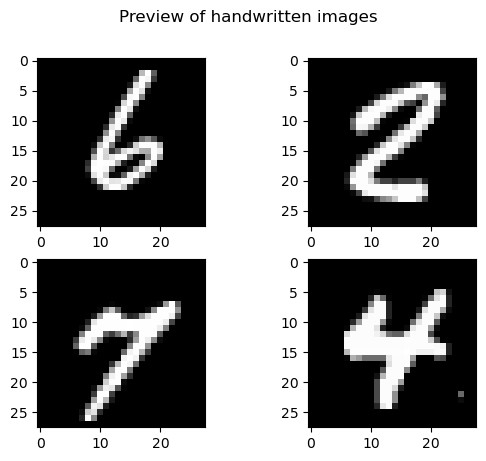

In [1]:
# Preview the data as images using matplotlib
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Preview of handwritten images')
ax1.imshow(test_data[np.random.randint(len(test_data))][:, :, 0], cmap='gray')
ax2.imshow(test_data[np.random.randint(len(test_data))][:, :, 0], cmap='gray')
ax3.imshow(test_data[np.random.randint(len(test_data))][:, :, 0], cmap='gray')
ax4.imshow(test_data[np.random.randint(len(test_data))][:, :, 0], cmap='gray')

In [ ]:
# Convert the labels from integers to vectors
trainX = train_data
trainY = to_categorical(train_label, num_classes=10)

# Construct the image generator for data augmentation (so that imagews are rotated and shifted to improve robustness of the model)
augmented_data = ImageDataGenerator(rotation_range=10,
                         width_shift_range=0.1,
                         height_shift_range=0.1,
                         shear_range=0.1,
                         zoom_range=0.1,
                         fill_mode="nearest")

## Modelling 

The base model I will be using, LeNet, is among the first published CNNs to capture wide attention for its performance on computer vision tasks. The model was introduced by (and named for) Yann LeCun, then a researcher at AT&T Bell Labs, for the purpose of recognizing handwritten digits in images (LeCun et al., 1998). This work represented the culmination of a decade of research developing the technology; LeCun’s team published the first study to successfully train CNNs via backpropagation (LeCun et al., 1989).

At the time LeNet achieved outstanding results matching the performance of support vector machines, then a dominant approach in supervised learning, achieving an error rate of less than 1% per digit. LeNet was eventually adapted to recognize digits for processing deposits in ATM machines. To this day, some ATMs still run the code that Yann LeCun and his colleague Leon Bottou wrote in the 1990s!

In [2]:
# Define the model with all its layers. The base of the model is the LeNet CNN.
class LeNet:
    def __init__(self, input_shape=(224, 224, 3), classes=2):
        # Initialize the model
        model = Sequential()
        inputShape = input_shape  # (height, width, depth)

        # First set of CONV => RELU => POOL layers
        model.add(Rescaling(scale=1.0 / 255, input_shape=input_shape))
        model.add(Conv2D(20, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # Second set of CONV => RELU => POOL layers
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # First (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        # Softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # Create model
        self.model = model

    def get_model(self):
        return self.model

# Initialize the model
model = LeNet(input_shape=(28, 28, 1), classes=10)
epochs = 30
mymodel = model.get_model()

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-3, decay_steps=1000, decay_rate=0.9)
optimizer = Adam(learning_rate=lr_schedule)
mymodel.compile(loss='CategoricalCrossentropy', optimizer=optimizer, metrics=["accuracy"])

In [ ]:
# Train the network
H = mymodel.fit(augmented_data.flow(trainX, trainY, batch_size=64), steps_per_epoch=int(len(trainX) / 64), epochs=epoch_num, verbose=1)

Epoch 1/30


1593/1593 [==============================] - 29s 18ms/step - loss: 0.9663 - accuracy: 0.6689
Epoch 2/30
1593/1593 [==============================] - 29s 18ms/step - loss: 0.2674 - accuracy: 0.9183
Epoch 3/30
1593/1593 [==============================] - 29s 18ms/step - loss: 0.2013 - accuracy: 0.9382
Epoch 4/30
1593/1593 [==============================] - 29s 18ms/step - loss: 0.1697 - accuracy: 0.9480
Epoch 5/30
1593/1593 [==============================] - 29s 18ms/step - loss: 0.1502 - accuracy: 0.9545
Epoch 6/30
1593/1593 [==============================] - 29s 18ms/step - loss: 0.1383 - accuracy: 0.9571
Epoch 7/30
1593/1593 [==============================] - 29s 18ms/step - loss: 0.1285 - accuracy: 0.9609
Epoch 8/30
1593/1593 [==============================] - 29s 18ms/step - loss: 0.1216 - accuracy: 0.9629
Epoch 9/30
1593/1593 [==============================] - 29s 18ms/step - loss: 0.1155 - accuracy: 0.9640
Epoch 10/30
1593/1593 [==============================] - 28s 1

Achieving an accuracy of 99.3%, the LeNet neural network excels in accurately predicting handwritten digits.

## Predictions

In [ ]:
# Predictions
predictions = mymodel.predict(test_data)
predictions = [np.argmax(i) for i in predictions]

df = pd.DataFrame()
df.insert(0, 'ImageId', [i for i in range(1, len(predictions) + 1)])
df.insert(1, 'Label', predictions)
df.head()

df.to_csv('submission.csv', index=False)